In [31]:
import matplotlib.pyplot as plt

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis
import numpy as np

In [32]:
N = 64
p = 3

sim = AdvectionSolver(
    ic=lambda array_slicer, x, y, z, t, xp: ic.square(
        array_slicer, x, y, z, vx=1, xp=xp
    ),
    nx=N,
    p=p,
    # MOOD=True,
    # cascade="first-order",
    # max_MOOD_iters=2,
    ZS=True,
    PAD={"rho": (0, 1)},
    PAD_atol=0.0,
)
sim.run(100.0)

100%|██████████| 100.0/100.0 [00:32]               


In [33]:
np.min(sim.minisnapshots["min_rho"]), np.max(sim.minisnapshots["max_rho"])

(np.float64(0.0), np.float64(1.0))

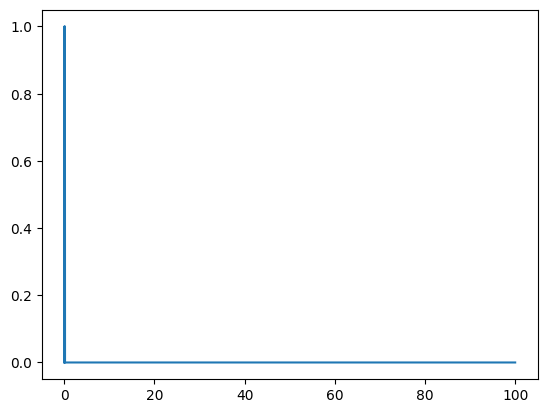

In [34]:
plt.plot(sim.minisnapshots["t"], sim.minisnapshots["n_dt_revisions"])

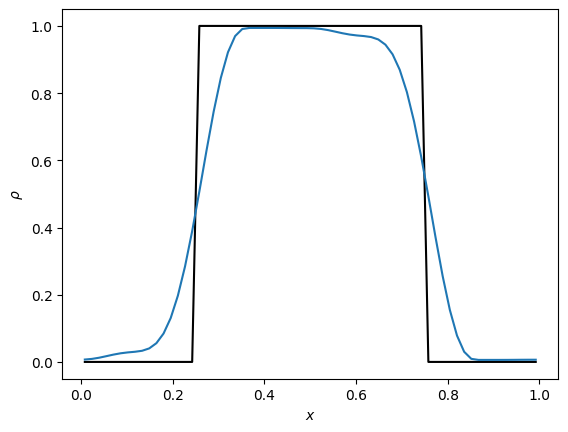

In [35]:
fig, ax = plt.subplots(1, 1)
ax.set_ylabel(r"$\rho$")
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, t=0, color="k")
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, xlabel=True)